### Uniform, random sampling of a unitary from the single qubit Clifford group Cl(2)
The Pauli group $P_n$ is defined as all possible tensor products of
$n$ Pauli matrices $\sigma_j \in \{ I, X, Y, Z \}$ plus a phase. \\
\begin{equation}
    P_n = \{ e^{i k \pi / 2} \sigma_1 \otimes \sigma_2 \otimes \ldots \otimes \sigma_n | k \in \{0,1,2,3 \} \}
\end{equation}
The $n$-qubit Clifford group $Cl(2^n)$ is the normalizer of the Pauli group which means that $Cl(2^n)$ consists of all unitaries that map elements in $P_n$ to elements in $P_n$.
\begin{equation}
    Cl(2^n) = \{ U \in \mathbf{U}(2^n) | U P_n U^\dagger = P_n\}
\end{equation}
The single qubit Clifford group $Cl(2)$ has 24 elements and is generated
 by the Hadamard gate $H$ and the phase gate $S$.
  To find the 24 elements we simply have to compute all possible products
   of $H$ and $S$ until we have 24 unique elements. We let a computer algorithm do this.

In [34]:
import numpy as np
import constants
from Bloch import Bloch
import torch as pt
import sys
from pathlib import Path
sys.path.append(Path('../src'))

In [28]:
had = np.array([[1,1],[1,-1]]) / np.sqrt(2)
phase = np.array([[1, 0],[0, 1j]])
identity = np.array([[1, 0], [0, 1]])
generators = ['H', 'S']
gen_repr = {'H': had, 'S': phase}
clifford_group_matrix_rep = []
clifford_group_gen_products = []
for string_length in np.arange(1, 8, 1):
    numbers = np.arange(0, 2**string_length, 1, dtype=np.uint8)
    bits = np.unpackbits(numbers, axis=0)
    bits_shape = []
    for num in numbers:
        bits_shape.append(bits[num * 8 + (8 - string_length): (num + 1) * 8])
    perm_generators = np.empty((np.size(bits_shape, axis=0), string_length), dtype=str)
    for i in range(0, np.size(bits_shape, axis=0)):
        for j in range(0, string_length):
            perm_generators[i,j] = generators[int(bits_shape[i][j])]
    #print(perm_generators)
    # now we have all possible permutations
    for gen_perm in perm_generators:
        mat_rep = identity
        for gen in gen_perm:
            mat_rep = mat_rep @ gen_repr[gen]
        counter = 0
        for matrix_rep in clifford_group_matrix_rep:
            angles = np.arange(0, 8, 1) * np.pi / 4
            for angle in angles:
                if not np.allclose(np.exp(1j * angle) * mat_rep, matrix_rep, atol=1e-5):
                    counter = counter + 1
        if counter == 8*np.size(clifford_group_matrix_rep, axis=0):
                clifford_group_matrix_rep.append(mat_rep)
                clifford_group_gen_products.append(gen_perm)

clifford_group_gen_products = np.array(clifford_group_gen_products)
print(clifford_group_gen_products)
#print(np.round(clifford_group_matrix_rep, decimals=5))
print(np.size(clifford_group_gen_products, axis=0))

[array(['H'], dtype='<U1') array(['S'], dtype='<U1')
 array(['H', 'H'], dtype='<U1') array(['H', 'S'], dtype='<U1')
 array(['S', 'H'], dtype='<U1') array(['S', 'S'], dtype='<U1')
 array(['H', 'S', 'H'], dtype='<U1') array(['H', 'S', 'S'], dtype='<U1')
 array(['S', 'H', 'S'], dtype='<U1') array(['S', 'S', 'H'], dtype='<U1')
 array(['S', 'S', 'S'], dtype='<U1')
 array(['H', 'S', 'H', 'S'], dtype='<U1')
 array(['H', 'S', 'S', 'H'], dtype='<U1')
 array(['H', 'S', 'S', 'S'], dtype='<U1')
 array(['S', 'H', 'S', 'S'], dtype='<U1')
 array(['S', 'S', 'H', 'S'], dtype='<U1')
 array(['H', 'S', 'H', 'S', 'S'], dtype='<U1')
 array(['H', 'S', 'S', 'H', 'S'], dtype='<U1')
 array(['S', 'H', 'S', 'S', 'H'], dtype='<U1')
 array(['S', 'H', 'S', 'S', 'S'], dtype='<U1')
 array(['S', 'S', 'H', 'S', 'S'], dtype='<U1')
 array(['H', 'S', 'H', 'S', 'S', 'H'], dtype='<U1')
 array(['H', 'S', 'H', 'S', 'S', 'S'], dtype='<U1')
 array(['H', 'S', 'S', 'H', 'S', 'S'], dtype='<U1')]
24


C:\Users\Lenna\AppData\Local\Temp/ipykernel_10896/1051279907.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clifford_group_gen_products = np.array(clifford_group_gen_products)


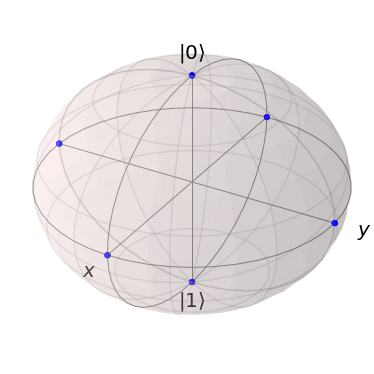

In [38]:
# now we apply the clifford unitaries to the state $|0>$ and see where that
# takes us on the Bloch sphere
ini_zero = [0,1]
pauliExpVals = []
X = np.array([[0,1],
           [1,0]])
Y = np.array([[0,-1j],
           [1j,0]])
Z = np.array([[1,0],
           [0,-1]])
for rotation_matr in clifford_group_matrix_rep:
    state = rotation_matr.conj().T @ ini_zero
    #print([X,Y,Z] )
    # calculate the spin expectation values
    pauliExpVals.append(state.conj().T @ [X,Y,Z] @ state)
    # plot a point on the sphere
b = Bloch()
b.add_points(np.transpose(pauliExpVals))
b.show()
bb = b.fig
bb.savefig(Path('plots/theory_plots/cliffords_on_bloch_sphere.png'))
